# Importing libraries

In [1]:
import sys
sys.path.append('../') 
from imports import *
from sklearn.svm import SVC

In [2]:
def plot_roc_pr_curves(y_true, y_probs, n_bootstraps=1000):
    """Perform bootstrapping to calculate the confidence intervals for ROC & PR curves"""
    bootstrap_auroc_scores = []
    bootstrap_average_precision_scores = []

    for _ in range(n_bootstraps):
        # Bootstrap sample (with replacement)
        indices = resample(np.arange(len(y_true)), replace=True)
        y_true_boot = y_true[indices]
        y_probs_boot = y_probs[indices]

        # Compute metrics for bootstrap sample
        bootstrap_auroc_scores.append(roc_auc_score(y_true_boot, y_probs_boot))
        bootstrap_average_precision_scores.append(average_precision_score(y_true_boot, y_probs_boot))

    # Compute confidence intervals
    auroc_lower = np.percentile(bootstrap_auroc_scores, 2.5)
    auroc_upper = np.percentile(bootstrap_auroc_scores, 97.5)
    ap_lower = np.percentile(bootstrap_average_precision_scores, 2.5)
    ap_upper = np.percentile(bootstrap_average_precision_scores, 97.5)

    # Calculate original ROC and PR curves
    fpr, tpr, _ = roc_curve(y_true, y_probs)
    precision, recall, _ = precision_recall_curve(y_true, y_probs)
    auroc = roc_auc_score(y_true, y_probs)
    average_precision = average_precision_score(y_true, y_probs)

    # Plotting
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

    # ROC Curve
    ax1.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {auroc:.2f})')
    ax1.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    ax1.set_xlabel('False Positive Rate')
    ax1.set_ylabel('True Positive Rate')
    ax1.set_title('Receiver Operating Characteristic')
    ax1.legend(loc="lower right", title=f'95% CI: [{auroc_lower:.2f}, {auroc_upper:.2f}]')

    # Precision-Recall Curve
    ax2.plot(recall, precision, color='blue', lw=2, label=f'PR curve (area = {average_precision:.2f})')
    ax2.set_xlabel('Recall')
    ax2.set_ylabel('Precision')
    ax2.set_title('Precision-Recall Curve')
    ax2.legend(loc="lower left", title=f'95% CI: [{ap_lower:.2f}, {ap_upper:.2f}]')

    plt.show()

    # Return the confidence intervals
    return (np.round(auroc_lower,2), np.round(auroc_upper,2)), (np.round(ap_lower,2), np.round(ap_upper,2))




# Loading pre-processed saved datasets

In [3]:
# Loading the datasets
X_train = pd.read_csv('./breast-cancer-processed-data/X_train.csv')
y_train = pd.read_csv('./breast-cancer-processed-data/y_train.csv') 
X_val = pd.read_csv('./breast-cancer-processed-data/X_val.csv')
y_val = pd.read_csv('./breast-cancer-processed-data/y_val.csv')
X_test = pd.read_csv('./breast-cancer-processed-data/X_test.csv')
y_test = pd.read_csv('./breast-cancer-processed-data/y_test.csv')

y_train = y_train.squeeze()
y_val = y_val.squeeze()
y_test = y_test.squeeze()


# SVM without kernels

In [4]:
# Initialize the SVM model without kernel
svm = SVC(kernel='linear', probability=True, random_state=1)

# Train the model on the training set
svm.fit(X_train, y_train)

# Predict on the validation set
y_val_pred = svm.predict(X_val)
print(confusion_matrix(y_val, y_val_pred))
print(classification_report(y_val, y_val_pred))

# Evaluate the model on the validation set
val_accuracy = accuracy_score(y_val, y_val_pred)
print(f"Validation Set Accuracy: {val_accuracy:.4f}")


[[32  2]
 [ 0 57]]
              precision    recall  f1-score   support

           0       1.00      0.94      0.97        34
           1       0.97      1.00      0.98        57

    accuracy                           0.98        91
   macro avg       0.98      0.97      0.98        91
weighted avg       0.98      0.98      0.98        91

Validation Set Accuracy: 0.9780


In [5]:
# Predict probabilities
y_val_probs = svm.predict_proba(X_val)[:, 1]

# Compute AUROC
auroc = roc_auc_score(y_val, y_val_probs)
print(f"Area under the ROC curve: {auroc:.2f}")

# Compute Precision-Recall curve and its area
average_precision = average_precision_score(y_val, y_val_probs)
print(f"Area under the Precision-Recall curve: {average_precision:.2f}")

Area under the ROC curve: 1.00
Area under the Precision-Recall curve: 1.00


# svm with polynomial kernel

In [6]:
# Initialize the SVM model with polynomial kernel
svm_poly = SVC(kernel='poly', probability=True, random_state=1)

# Train the model on the training set
svm_poly.fit(X_train, y_train)

# Predict on the validation set
y_val_pred_poly = svm_poly.predict(X_val)
print(confusion_matrix(y_val, y_val_pred_poly))
print(classification_report(y_val, y_val_pred_poly))

# Evaluate the model on the validation set
val_accuracy = accuracy_score(y_val, y_val_pred_poly)
print(f"Validation Set Accuracy: {val_accuracy:.4f}")

[[26  8]
 [ 0 57]]
              precision    recall  f1-score   support

           0       1.00      0.76      0.87        34
           1       0.88      1.00      0.93        57

    accuracy                           0.91        91
   macro avg       0.94      0.88      0.90        91
weighted avg       0.92      0.91      0.91        91

Validation Set Accuracy: 0.9121


In [7]:
# Predict probabilities
y_val_probs_poly = svm_poly.predict_proba(X_val)[:, 1]

# Compute AUROC
auroc = roc_auc_score(y_val, y_val_probs_poly)
print(f"Area under the ROC curve: {auroc:.2f}")

# Compute Precision-Recall curve and its area
average_precision = average_precision_score(y_val, y_val_probs_poly)
print(f"Area under the Precision-Recall curve: {average_precision:.2f}")

Area under the ROC curve: 1.00
Area under the Precision-Recall curve: 1.00


# svm with rbf kernel

In [8]:
# Initialize the SVM model without kernel
svm_rbf = SVC(kernel='rbf', probability=True, random_state=1)

# Train the model on the training set
svm_rbf.fit(X_train, y_train)

# Predict on the validation set
y_val_pred_rbf = svm_rbf.predict(X_val)
print(confusion_matrix(y_val, y_val_pred_rbf))
print(classification_report(y_val, y_val_pred_rbf))

# Evaluate the model on the validation set
val_accuracy = accuracy_score(y_val, y_val_pred_rbf)
print(f"Validation Set Accuracy: {val_accuracy:.4f}")

[[33  1]
 [ 0 57]]
              precision    recall  f1-score   support

           0       1.00      0.97      0.99        34
           1       0.98      1.00      0.99        57

    accuracy                           0.99        91
   macro avg       0.99      0.99      0.99        91
weighted avg       0.99      0.99      0.99        91

Validation Set Accuracy: 0.9890


In [9]:
# Predict probabilities
y_val_probs_rbf = svm_rbf.predict_proba(X_val)[:, 1]

# Compute AUROC
auroc = roc_auc_score(y_val, y_val_probs_rbf)
print(f"Area under the ROC curve: {auroc:.2f}")

# Compute Precision-Recall curve and its area
average_precision = average_precision_score(y_val, y_val_probs_rbf)
print(f"Area under the Precision-Recall curve: {average_precision:.2f}")

Area under the ROC curve: 1.00
Area under the Precision-Recall curve: 1.00


# svm with rbf kernel is the best: using this model to make predictions on test set

In [10]:
# Predict on the test set
y_test_pred = svm_rbf.predict(X_test)

# Predict probabilities on the test set
y_test_probs = svm_rbf.predict_proba(X_test)[:, 1]

# Compute AUROC
auroc = roc_auc_score(y_test, y_test_probs)
print(f"Area under the ROC curve: {auroc:.2f}")

# Compute Precision-Recall curve and its area
average_precision = average_precision_score(y_test, y_test_probs)
print(f"Area under the Precision-Recall curve: {average_precision:.2f}")

Area under the ROC curve: 1.00
Area under the Precision-Recall curve: 1.00


Test Accuracy: 0.9737
[[39  3]
 [ 0 72]]
              precision    recall  f1-score   support

           0       1.00      0.93      0.96        42
           1       0.96      1.00      0.98        72

    accuracy                           0.97       114
   macro avg       0.98      0.96      0.97       114
weighted avg       0.97      0.97      0.97       114



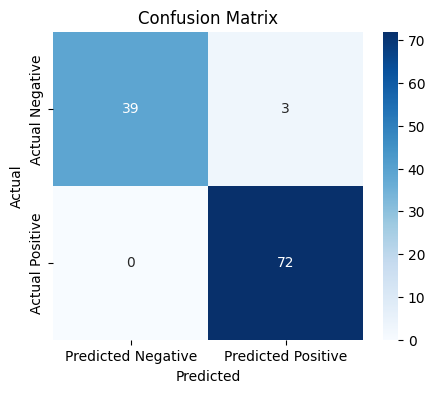

In [11]:
# Generating the confusion matrix
cm = confusion_matrix(y_test, y_test_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f"Test Accuracy: {test_accuracy:.4f}")
print(cm)
print(classification_report(y_test, y_test_pred))


# Plotting the confusion matrix
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap='Blues', 
            xticklabels=['Predicted Negative', 'Predicted Positive'],
            yticklabels=['Actual Negative', 'Actual Positive'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()

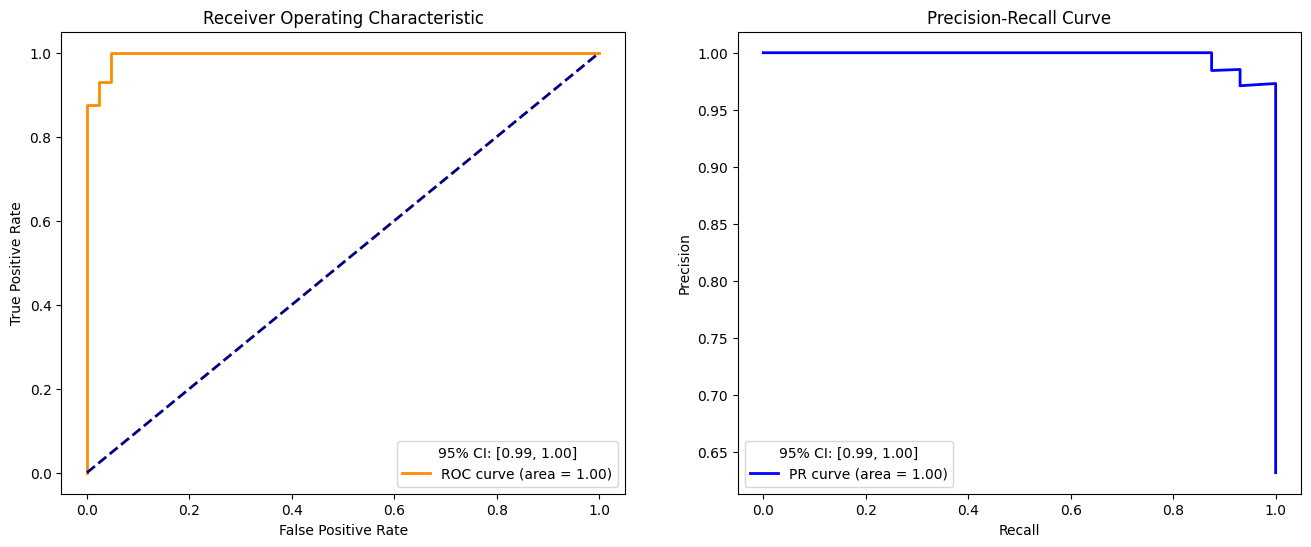

((0.99, 1.0), (0.99, 1.0))

In [12]:
# Plot AUROC and PR curves on test set with 95% confidence intervals
plot_roc_pr_curves(y_test, y_test_probs)